## Dragon Real Estate


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      19
7      17
Name: RAD, dtype: int64

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
# draws histogram to gain knowledge about data
# housing.hist(bins=50,figsize = (20,15))


In [10]:
housing['NOX'].value_counts()

0.538    22
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.435     1
0.518     1
0.394     1
0.385     1
0.389     1
Name: NOX, Length: 81, dtype: int64

## train-test splitting

In [11]:
# for learning purpose
# import numpy as np
# def split_test_train(data,test_ratio) :
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) *test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
# train_set,test_set = split_test_train(housing,0.2)

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

Rows in train set: 404 
 Rows in test set: 101


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['CHAS']):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [15]:
 strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [16]:
 strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
housing =  strat_train_set.copy()

## correlation between the elements

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.661909
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

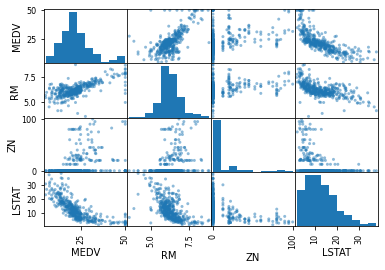

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

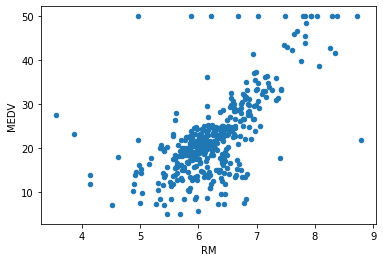

In [21]:
housing.plot(kind = "scatter",x = "RM",y="MEDV")

## Trying out attribute combinations

In [22]:
housing["TAXRM"] = housing["TAX"]/ housing["RM"]

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

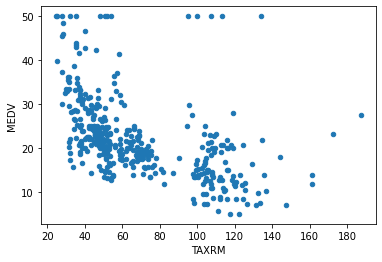

In [23]:
housing.plot(kind = "scatter",x = "TAXRM",y="MEDV")

In [24]:
housing  = strat_train_set.drop("MEDV", axis = 1)
housing_labels =strat_train_set["MEDV"].copy() 

## missing attributes

In [25]:
# to take care about missing attributes we can do three things
# 1 eleiminate the NA values
# 2 eliminate the whole column
# 3 to put (0,mean,median) values against NA values

In [26]:
housing.dropna(subset = ["RM"]).shape   # this will not affect the original data

(400, 13)

In [27]:
housing.drop("RM",axis = 1).shape# this will not affect the original data

(404, 12)

In [28]:
median = housing["RM"].median()# this will not affect the original data

In [29]:
median

6.179

In [30]:
housing["RM"].fillna(median)# this will not affect the original data

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1790e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [33]:
x = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(x, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251220,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688313,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## sklearn design


three types of objects are:-
1. estimators - it estimates some parameter based on a dataset. eg = imputer, it has also a fit method and transform method
   fit method - fits the dataset and calculates internal parameters
   
2. transformers -  transform method takes input and return output based on the learnings from fit(). it has also a conveneince method called fit_transform() which fits and transform data

3. predictors - linear regression model is the example. predicts() and fits() two common function. it also gives score which will evaluate the predictions
    

## feature scaling

primarily , there are two types of feature scaling:
1 min-max method(normalisation)- (value - min)/ (max- min)   -->(0,1)
sklearn provides a class called min-max scaler

2 standardisation -
(value - mean)/ std
sklearn provides a standard scaler for this


## creating a pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy ='median')),
    ('std_scaler', StandardScaler()),
])

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [37]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for dragon real estates

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([20.463, 27.33 , 12.8  , 21.064, 22.049])

In [43]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [45]:
lin_rmse

1.266160341307921

## using better validation technique - cross validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores


array([3.31510822, 2.48135359, 5.0150652 , 2.75152549, 2.78383133,
       2.55897261, 2.90080557, 2.87992206, 1.98476594, 4.67964171])

In [48]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:", scores.std())

In [49]:
print_scores(rmse_scores)

scores: [3.31510822 2.48135359 5.0150652  2.75152549 2.78383133 2.55897261
 2.90080557 2.87992206 1.98476594 4.67964171]
mean: 3.1350991720034544
std: 0.9178989895385724


In [50]:
 import joblib
joblib.dump(model, 'dg.joblib')

['dg.joblib']

In [51]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [52]:
final_rmse

3.5616585426255307

# completed

In [53]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54580587, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])